## Linear regression and Model Evaluation

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 

In [3]:
# Load dataset from an csv file

cost = pd.read_csv('cost_clean.csv')
cost.head()

,city,country,continent,restaurant,groceries,transport,freetime,utilities,childcare,clothing,rent,housing_price,average_salary
0,Delhi,India,Asia,4.90,36.63,11.63,12.98,65.33,73.76,37.75,319.81,1844.18,586.35
1,Shanghai,China,Asia,7.72,71.51,27.94,35.80,81.50,1356.63,77.79,1537.29,13253.98,1382.83
2,Jakarta,Indonesia,Asia,4.57,62.00,9.53,17.02,110.57,132.74,54.51,613.76,1981.74,483.19
3,Manila,Philippines,Asia,5.25,46.84,11.86,26.79,135.47,254.89,49.18,820.13,3066.24,419.02
4,Seoul,South Korea,Asia,9.95,127.80,41.47,32.13,198.30,384.01,70.25,1424.56,16340.42,2672.23


In [4]:
# drop categorical columns

cost.drop(['city', 'country', 'continent'], axis=1, inplace=True) 

In [5]:
cost.columns

Index(['restaurant', 'groceries', 'transport', 'freetime', 'utilities',
       'childcare', 'clothing', 'rent', 'housing_price', 'average_salary'],
      dtype='object')

In [6]:
# X-y split (y is the target variable, in this case, "average_salary") ### numerical variables 

X = cost[['restaurant', 'groceries', 'transport', 'freetime',
       'utilities', 'childcare', 'clothing', 'rent', 'housing_price']]
y = cost[['average_salary']]

In [7]:
X

,restaurant,groceries,transport,freetime,utilities,childcare,clothing,rent,housing_price
0,4.90,36.63,11.63,12.98,65.33,73.76,37.75,319.81,1844.18
1,7.72,71.51,27.94,35.80,81.50,1356.63,77.79,1537.29,13253.98
2,4.57,62.00,9.53,17.02,110.57,132.74,54.51,613.76,1981.74
3,5.25,46.84,11.86,26.79,135.47,254.89,49.18,820.13,3066.24
4,9.95,127.80,41.47,32.13,198.30,384.01,70.25,1424.56,16340.42
...,...,...,...,...,...,...,...,...,...
4644,13.80,100.61,78.01,13.41,179.06,1341.25,57.49,1379.86,4196.00
4645,12.64,68.43,90.53,28.50,147.37,1421.63,68.12,797.78,4498.33
4646,13.91,91.46,52.96,30.90,185.94,176.53,115.51,1068.00,1888.86
4647,7.59,4.63,19.72,16.86,105.46,191.87,62.26,402.14,943.56


In [8]:
y

,average_salary
0,586.35
1,1382.83
2,483.19
3,419.02
4,2672.23
...,...
4644,5867.96
4645,3435.18
4646,2471.40
4647,635.37


In [9]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [10]:
# Standardize the data (after the data split!)

scaler = StandardScaler()

In [11]:
# fit and scale for X_train

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled

,restaurant,groceries,transport,freetime,utilities,childcare,clothing,rent,housing_price
0,-0.375142,1.085154,0.269145,1.981440,0.446258,-0.810673,0.662739,0.196268,-0.502978
1,-0.542665,-0.334913,0.786326,1.145170,0.843770,-0.583236,-0.204380,3.309235,-0.356373
2,-0.182871,-1.192226,-0.950980,-0.786845,-1.295392,-0.673965,2.214109,-0.801014,-0.716517
3,0.367289,-0.314665,1.685619,1.811211,0.251353,1.452975,0.132165,0.511820,0.132636
4,-0.662596,0.552199,-0.225578,0.964199,-0.769777,-0.089947,0.193980,0.063263,0.366437
...,...,...,...,...,...,...,...,...,...
3481,-0.988123,-0.715050,-0.253812,0.446901,-0.024155,-0.405754,0.165648,-0.664275,-0.600088
3482,-1.298421,-1.216295,-1.061667,-0.981864,-1.230890,-0.805138,-1.732141,-1.011877,-0.813699
3483,-0.243789,-0.907219,-0.141841,-1.340502,-1.196489,-0.999460,-0.202663,-0.594905,-0.789941
3484,-0.784431,-0.141216,-1.143158,-0.781060,-1.291792,-0.673556,-0.644808,-0.170621,0.132116


In [12]:
# only scale for X_test, we dont fit them!

scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled

,restaurant,groceries,transport,freetime,utilities,childcare,clothing,rent,housing_price
0,0.287335,0.815429,0.599923,-0.869480,0.753567,1.078968,-0.732378,1.145107,0.151913
1,-0.599775,-0.285247,-0.751743,-1.151267,-1.333293,-0.200322,1.077411,-0.660051,-0.478033
2,-1.306036,-1.080668,-0.967021,-0.976080,-1.092986,-0.854644,-1.450112,-1.026320,-0.879417
3,0.313986,2.049822,0.394269,0.463428,-0.034155,0.454058,0.621100,0.862497,0.167033
4,-1.368857,-0.922883,-1.116850,-1.005828,-1.448496,-1.004118,-1.790950,-0.809320,-0.593145
...,...,...,...,...,...,...,...,...,...
1158,-1.321265,-1.432533,-0.487377,-0.905013,-0.932481,-0.700590,-1.242347,-0.942623,-0.580644
1159,-0.378949,-0.436538,-0.591006,1.398034,0.158650,-0.369560,0.217589,-0.554897,-0.374840
1160,-0.965279,-0.123260,-1.152462,-0.343919,-0.527970,-0.864779,-0.439618,-0.548606,-0.527444
1161,-0.102917,-0.236345,-0.884888,2.969759,0.036047,-0.456917,0.845607,-0.416621,-0.562170


In [13]:
# Apply linear regression

lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train)

In [14]:
coefficients = model.coef_

In [15]:
coefficients

array([[ 210.88629727,  221.1439179 ,  226.63351724,  -16.519474  ,
         181.95121996,  468.02853612, -111.92928448,  456.22914593,
          17.34510406]])

In [16]:
model.intercept_

array([1929.86690476])

In [17]:
y_pred = model.predict(X_test_scaled)

In [18]:
y_test.reset_index(inplace=True)

In [19]:
pd.DataFrame(y_pred)

,0
0,3570.256219
1,822.579474
2,292.375070
3,3064.258408
4,288.028383
...,...
1158,440.298065
1159,1168.262972
1160,732.500909
1161,1104.527273


In [20]:
y_pred.shape

(1163, 1)

In [21]:
real_vs_pred = pd.DataFrame({'y_test': y_test['average_salary'], 'y_pred': y_pred[:,0]})

In [22]:
real_vs_pred

,y_test,y_pred
0,3987.55,3570.256219
1,818.44,822.579474
2,415.77,292.375070
3,2233.58,3064.258408
4,367.28,288.028383
...,...,...
1158,223.61,440.298065
1159,652.99,1168.262972
1160,397.13,732.500909
1161,1644.06,1104.527273


In [23]:
### Linear Regression using statsmodels

X_train_const = sm.add_constant(X_train.to_numpy())

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_salary   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1038.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:14:34   Log-Likelihood:                -28422.
No. Observations:                3486   AIC:                         5.686e+04
Df Residuals:                    3476   BIC:                         5.693e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.0697     45.706     -6.018      0.000    -364.683    -185.456
x1            40.1458      4.229      9.493      0.000      31.854      48.437
x2             8.4487      0.787     10.742      0.000       6.907       9.991
x3             7.2711      0.616     11.794      0.000       6.062       8.480
x4            -1.3651      1.371     -0.996      0.319      -4.052       1.322
x5             1.8196      0.182      9.986      0.000       1.462       2.177
x6             0.9122      0.042     21.926      0.000       0.831       0.994
x7            -4.8048      0.731     -6.575      0.000      -6.238      -3.372
x8             0.5894      0.028     21.393      0.000       0.535       0.643
x9             0.0059      0.005      1.099      0.272      -0.005       0.017
==============================================================================
Omnibus:                      999.614   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23968.830
Skew:                           0.807   Prob(JB):                         0.00
Kurtosis:                      15.744   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Evaluation 

- Model Evaluation: MSE. RMSE. MAE. R2. Adjusted R2.
- Feature Importance.

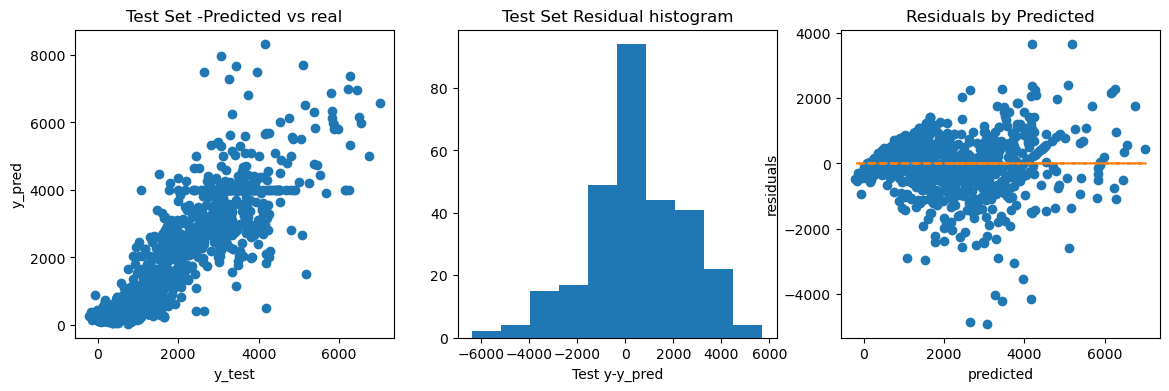

In [24]:
### Some plots

## Plot y_pred vs y_test
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['average_salary'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
# Does it ressemble a normal distribution?
ax[1].hist(y_test['average_salary'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['average_salary']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [25]:
# mse: mean squared error

mse = mse(real_vs_pred['y_test'], real_vs_pred['y_pred'])
mse

627376.659071132

In [26]:
# rmse: root mean squared error

rmse = np.sqrt(mse)
rmse

792.0711199577548

In [27]:
# MAE: Mean Absolute Error 

mae = mean_absolute_error(y_test['average_salary'], y_pred) 
mae

533.9678957959974

In [28]:
# R-squared (R2)

r2 = r2_score(y_test['average_salary'], y_pred)
r2

0.7675970361557893

In [29]:
# adjusted R-squared

n = len(X_test) 
p = X_test.shape[1] 
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.765782962717283

In [30]:
# Get feature coefficients

coefficients

array([[ 210.88629727,  221.1439179 ,  226.63351724,  -16.519474  ,
         181.95121996,  468.02853612, -111.92928448,  456.22914593,
          17.34510406]])

In [31]:
coefficients.shape

(1, 9)

In [32]:
coefficients = coefficients.reshape(9,)

In [33]:
coefficients.shape

(9,)

In [34]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient': coefficients})

In [35]:
feature_importances

,variable,coefficient
0,restaurant,210.886297
1,groceries,221.143918
2,transport,226.633517
3,freetime,-16.519474
4,utilities,181.951220
5,childcare,468.028536
6,clothing,-111.929284
7,rent,456.229146
8,housing_price,17.345104


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'restaurant'),
  Text(1, 0, 'groceries'),
  Text(2, 0, 'transport'),
  Text(3, 0, 'freetime'),
  Text(4, 0, 'utilities'),
  Text(5, 0, 'childcare'),
  Text(6, 0, 'clothing'),
  Text(7, 0, 'rent'),
  Text(8, 0, 'housing_price')])

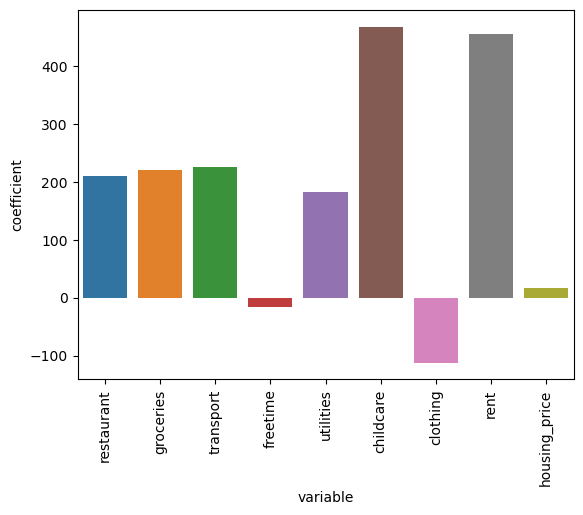

In [36]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])
plt.xticks(rotation=90)